In [1]:
import torch
import os
os.chdir('/workspaces/kornia/')
print(os.getcwd())

/workspaces/kornia


In [2]:
from test.geometry.nerf.test_rays import create_one_camera

from kornia.geometry.nerf.nerf_solver import NerfSolver

from torchvision.io import read_image

import matplotlib.pyplot as plt

torch.Size([756, 1008, 3])

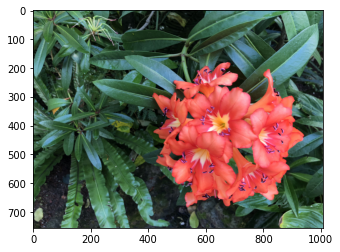

In [3]:
img = ['kornia/geometry/nerf/kornia_nerf_data/flower_4/images/image001.png']

img_plt = read_image(img[0])
img_plt = torch.permute(img_plt, (1, 2, 0))

plt.imshow(img_plt)
img_plt.shape

In [6]:
camera = create_one_camera(img_plt.shape[0], img_plt.shape[1], 'cpu')

nerf_obj = NerfSolver()
num_img_rays = 1024
nerf_obj.init_training(camera, 0.0, 3.0, img, num_img_rays, 32, 101, lr=1.e-2)
nerf_obj.run(num_epochs=200)

Epoch: 0: epoch_loss = 0.044098272279370576
Epoch: 1: epoch_loss = 0.027473939349874854
Epoch: 2: epoch_loss = 0.02802784414961934
Epoch: 3: epoch_loss = 0.028253410157049075
Epoch: 4: epoch_loss = 0.02725545282009989
Epoch: 5: epoch_loss = 0.028836262848926708
Epoch: 6: epoch_loss = 0.025152276153676212
Epoch: 7: epoch_loss = 0.028958931419765577
Epoch: 8: epoch_loss = 0.027438860473921522
Epoch: 9: epoch_loss = 0.02846045681508258
Epoch: 10: epoch_loss = 0.02740019073826261
Epoch: 11: epoch_loss = 0.027331822784617543
Epoch: 12: epoch_loss = 0.027266060933470726
Epoch: 13: epoch_loss = 0.025867653486784548
Epoch: 14: epoch_loss = 0.029203250305727124
Epoch: 15: epoch_loss = 0.027607810508925468
Epoch: 16: epoch_loss = 0.027185666433069855


KeyboardInterrupt: 

In [ ]:
img_rendered = nerf_obj.render_views(camera)[0]
img_rendered_plt = torch.permute(img_rendered, (1, 2, 0))

/usr/local/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


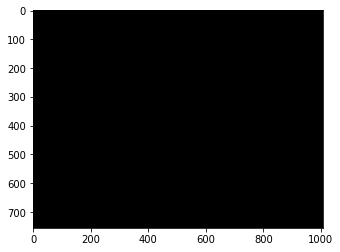

In [ ]:
plt.imshow(img_rendered_plt)